In [1]:
from __future__ import print_function, division
from builtins import range

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

wordnet_lemmatizer = WordNetLemmatizer()

In [2]:
titles = []
for line in open('C:/Users/malli/Desktop/ML/NLP/machine_learning_examples-master/machine_learning_examples-master/nlp_class/all_book_titles.txt'):
    titles.append(line.rstrip())

stop_words = set() 
for w in open('C:/Users/malli/Desktop/ML/NLP/machine_learning_examples-master/machine_learning_examples-master/nlp_class/stopwords.txt'):
    stop_words = stop_words.union({w.rstrip()}) 
    

stop_words = stop_words.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })



In [3]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stop_words] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens

In [4]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0

In [6]:
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1
        

print("Number of errors parsing file:", error_count, "number of lines in file:", len(titles))
if error_count == len(titles):
    print("There is no data to do anything with! Quitting...")
    exit()
    


Number of errors parsing file: 0 number of lines in file: 2373


In [18]:
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

In [19]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # terms will go along rows, documents along columns
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1


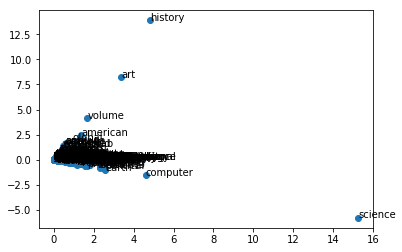

In [20]:
def main():
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
    plt.show()
    
    

if __name__ == '__main__':
    main()

In [23]:
svd = TruncatedSVD()
print(svd.fit_transform(X))

[[ 0.12215869  0.13107867]
 [ 0.19587375  0.29286045]
 [ 0.03619903  0.01186877]
 ...
 [ 0.01512735 -0.00090699]
 [ 0.01512735 -0.00090699]
 [ 0.01512735 -0.00090699]]
